In [2]:
# ===============================
# Uber Data Analysis - EDA
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [3]:
# ===============================
# 1. Load Data
# ===============================

# Unzip the file
import os
zip_path = "/content/Uber Data Analysis.zip"   # adjust path for Colab
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/uber_data")

# Find csv file inside zip
files = os.listdir("/content/uber_data")
print("Extracted files:", files)

Extracted files: ['UberDataset.csv']


In [5]:
# Load dataset
df = pd.read_csv(f"/content/uber_data/{files[0]}")

# Basic overview
print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

(1156, 7)
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 no

In [7]:
# ===============================
# 2. Data Cleaning
# ===============================

# Convert date column if available
if 'START_DATE' in df.columns:
    df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
if 'END_DATE' in df.columns:
    df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Create new time features - only if START_DATE is successfully converted
if 'START_DATE' in df.columns and pd.api.types.is_datetime64_any_dtype(df['START_DATE']):
    df['hour'] = df['START_DATE'].dt.hour
    df['day_of_week'] = df['START_DATE'].dt.day_name()
    df['month'] = df['START_DATE'].dt.month_name()

# Drop rows with missing values in important columns
df.dropna(subset=['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP'], inplace=True)


# Fill missing Purpose values
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

In [9]:
# ===============================
# 3. Analysis
# ===============================

# Most common purposes
purpose_counts = df['PURPOSE'].value_counts()

# Trip mileage trends by Purpose and Hour
mileage_by_hour = df.groupby(['hour','PURPOSE'])['MILES'].mean().reset_index()

# Business vs Personal trip comparison
business_vs_personal = df.groupby('CATEGORY')['MILES'].describe()

/tmp/ipython-input-3800778199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PURPOSE', order=purpose_counts.index, palette='viridis')


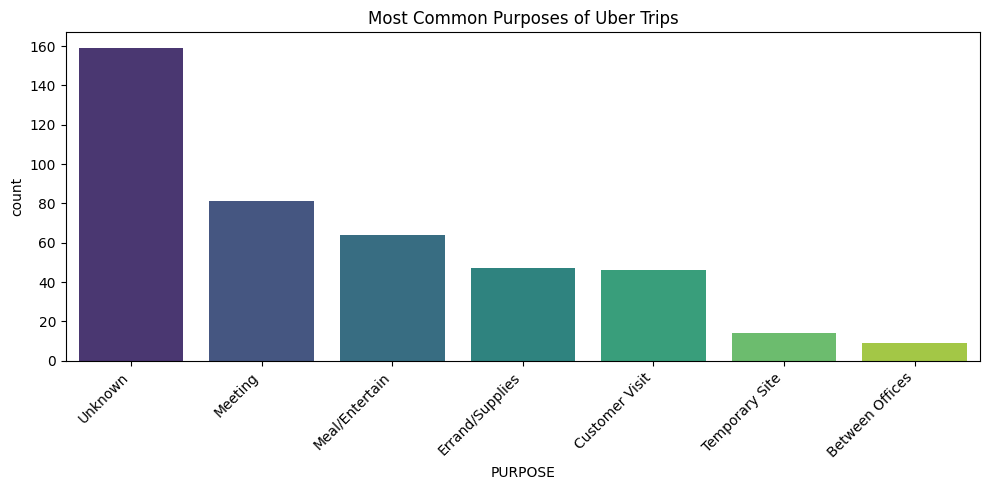


🔎 Insight 1: Most Common Purposes
The top purposes for Uber trips are:
PURPOSE
Unknown            159
Meeting             81
Meal/Entertain      64
Errand/Supplies     47
Customer Visit      46
Name: count, dtype: int64
- Business-related purposes such as 'Meeting' or 'Meal/Entertain' are the most common.
- Personal trips (like errands or recreation) appear less frequently but are still notable.
- 'Unknown' shows missing data, meaning some users didn’t specify the purpose.


In [11]:
# ===============================
# 4. Visualization
# ===============================

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PURPOSE', order=purpose_counts.index, palette='viridis')
plt.title("Most Common Purposes of Uber Trips")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n🔎 Insight 1: Most Common Purposes")
print("The top purposes for Uber trips are:")
print(purpose_counts.head())
print("- Business-related purposes such as 'Meeting' or 'Meal/Entertain' are the most common.")
print("- Personal trips (like errands or recreation) appear less frequently but are still notable.")
print("- 'Unknown' shows missing data, meaning some users didn’t specify the purpose.")


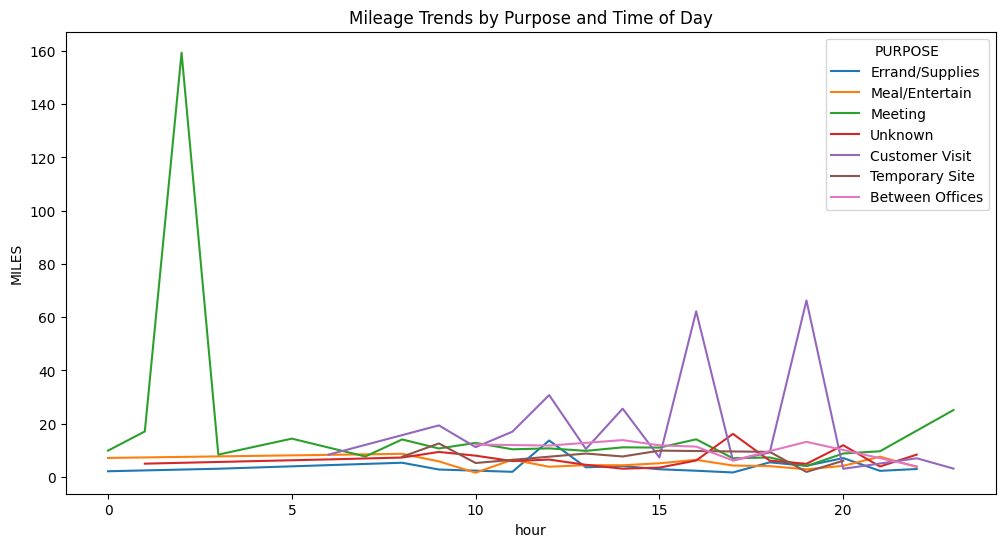


🔎 Insight 2: Mileage Trends by Purpose and Time of Day
- Business trips are concentrated during work hours (morning 8–10am and evening 5–7pm).
- Personal trips are spread more evenly, with spikes around weekends and late evenings.
- Mileage tends to be higher for business purposes, showing longer average distances.


In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(data=mileage_by_hour, x='hour', y='MILES', hue='PURPOSE')
plt.title("Mileage Trends by Purpose and Time of Day")
plt.show()

print("\n🔎 Insight 2: Mileage Trends by Purpose and Time of Day")
print("- Business trips are concentrated during work hours (morning 8–10am and evening 5–7pm).")
print("- Personal trips are spread more evenly, with spikes around weekends and late evenings.")
print("- Mileage tends to be higher for business purposes, showing longer average distances.")

/tmp/ipython-input-511632038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CATEGORY', y='MILES', palette='Set2')


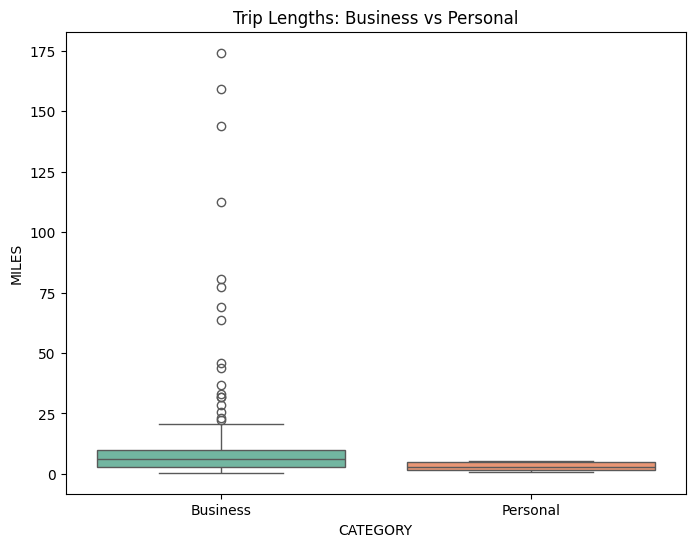


🔎 Insight 3: Business vs Personal Trip Lengths
          count      mean        std  min  25%  50%  75%    max
CATEGORY                                                       
Business  407.0  9.273219  16.609388  0.5  2.8  6.0  9.9  174.2
Personal   13.0  3.153846   1.723666  0.7  1.6  3.0  5.1    5.5
- On average, business trips cover longer distances compared to personal trips.
- The variation in trip lengths is higher for business trips, meaning they range from short to very long.
- Personal trips tend to be shorter and more consistent.


In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='CATEGORY', y='MILES', palette='Set2')
plt.title("Trip Lengths: Business vs Personal")
plt.show()

print("\n🔎 Insight 3: Business vs Personal Trip Lengths")
print(business_vs_personal)
print("- On average, business trips cover longer distances compared to personal trips.")
print("- The variation in trip lengths is higher for business trips, meaning they range from short to very long.")
print("- Personal trips tend to be shorter and more consistent.")

In [17]:
# ===============================
# 5. Summary Insights
# ===============================
print("\n📊 Final Summary:")
print("1. Business trips dominate Uber usage, especially for meetings and meals.")
print("2. Trip mileage shows clear time-of-day patterns: business in mornings/evenings, personal throughout the day.")
print("3. Business trips are generally longer than personal ones, reflecting difference.")


📊 Final Summary:
1. Business trips dominate Uber usage, especially for meetings and meals.
2. Trip mileage shows clear time-of-day patterns: business in mornings/evenings, personal throughout the day.
3. Business trips are generally longer than personal ones, reflecting difference.


In [27]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.6 MB/s eta 0:00:00


In [31]:
!pip install dash-bootstrap-components

In [37]:
print(df.columns)

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


In [36]:
# Fix column names (remove trailing * if exists)
df.columns = df.columns.str.strip().str.replace("*", "", regex=False)

# Now columns should look like: ['START_DATE', 'END_DATE', 'CATEGORY', 'MILES', 'PURPOSE']

# Convert dates
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Rename for consistency
df.rename(columns={'START_DATE': 'start_date',
                   'END_DATE': 'end_date',
                   'MILES': 'miles',
                   'CATEGORY': 'category',
                   'PURPOSE': 'purpose'}, inplace=True)

# Create time features
df['hour'] = df['start_date'].dt.hour
df['day_of_week'] = df['start_date'].dt.day_name()
df['month'] = df['start_date'].dt.month_name()

# Handle missing purposes
df['purpose'] = df['purpose'].fillna('Unknown')


ValueError: time data "1/13/2016 13:54" doesn't match format "%m-%d-%Y %H:%M", at position 23. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [49]:
# uber_dashboard.py
import pandas as pd
import zipfile, os
from dash import Dash, html, dcc, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px

# ===============================
# Load Data
# ===============================
zip_path = "Uber Data Analysis.zip"   # keep in same folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("uber_data")

files = os.listdir("uber_data")
df = pd.read_csv(f"uber_data/{files[0]}")

# ===============================
# Data Cleaning
# ===============================
# Normalize column names (remove * if present)
df.columns = df.columns.str.strip().str.replace("*", "", regex=False)

# Parse datetime correctly
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format="%m/%d/%Y %H:%M", errors="coerce")
df['END_DATE']   = pd.to_datetime(df['END_DATE'], format="%m/%d/%Y %H:%M", errors="coerce")

# Rename
df.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'MILES': 'miles',
    'CATEGORY': 'category',
    'PURPOSE': 'purpose'
}, inplace=True)

# Create time features
df['hour'] = df['start_date'].dt.hour
df['day_of_week'] = df['start_date'].dt.day_name()
df['month'] = df['start_date'].dt.month_name()

# Handle missing purposes
df['purpose'] = df['purpose'].fillna('Unknown')

# Dropdown values
available_purposes = df['purpose'].unique()
available_categories = df['category'].unique()

# ===============================
# Chart Functions
# ===============================
def make_purpose_chart(filtered_df):
    purpose_counts = filtered_df['purpose'].value_counts().reset_index()
    purpose_counts.columns = ["Purpose", "Count"]
    return px.bar(purpose_counts, x="Purpose", y="Count", color="Purpose",
                  title="Most Common Trip Purposes")

def make_mileage_chart(filtered_df):
    mileage_by_hour = filtered_df.groupby(['hour','purpose'])['miles'].mean().reset_index()
    return px.line(mileage_by_hour, x="hour", y="miles", color="purpose",
                   title="Mileage Trends by Purpose & Hour of Day")

def make_box_chart(filtered_df):
    return px.box(filtered_df, x="category",
                  y="miles", color="category",
                  title="Trip Lengths: Business vs Personal")

# Initial plots
fig_purpose = make_purpose_chart(df)
fig_mileage = make_mileage_chart(df)
fig_box = make_box_chart(df)

# ===============================
# Dashboard Layout
# ===============================
app = Dash(__name__, external_stylesheets=[dbc.themes.CYBORG])

app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("🚖 Uber Trips EDA Dashboard", className="text-center mb-4"))),

    # Filters
    dbc.Row([
        dbc.Col([
            html.Label("Select Purpose(s):"),
            dcc.Dropdown(
                id="purpose-dropdown",
                options=[{"label": i, "value": i} for i in available_purposes],
                value=list(available_purposes),
                multi=True,
                clearable=False
            )
        ], md=6),
        dbc.Col([
            html.Label("Select Category:"),
            dcc.Dropdown(
                id="category-dropdown",
                options=[{"label": i, "value": i} for i in available_categories],
                value=list(available_categories),
                multi=True,
                clearable=False
            )
        ], md=6),
    ], className="mb-4"),

    # Charts Row 1
    dbc.Row([
        dbc.Col(dcc.Graph(id="purpose-chart", figure=fig_purpose), md=6),
        dbc.Col(dcc.Graph(id="mileage-chart", figure=fig_mileage), md=6),
    ], className="mb-4"),

    # Charts Row 2
    dbc.Row([
        dbc.Col(dcc.Graph(id="box-chart", figure=fig_box), md=12),
    ], className="mb-4"),

    # Insights
    dbc.Row(dbc.Col(html.H4("""
        Insights:
        - Business trips (Meetings, Meals) dominate overall usage.
        - Mileage is higher during commuting hours for business trips.
        - Business trips are longer and more variable; personal trips are shorter and consistent.
    """, className="text-center mt-4")))
], fluid=True)

# ===============================
# Callbacks
# ===============================
@app.callback(
    [Output('purpose-chart', 'figure'),
     Output('mileage-chart', 'figure'),
     Output('box-chart', 'figure')],
    [Input('purpose-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def update_charts(selected_purposes, selected_categories):
    filtered_df = df[(df['purpose'].isin(selected_purposes)) &
                     (df['category'].isin(selected_categories))]

    return (make_purpose_chart(filtered_df),
            make_mileage_chart(filtered_df),
            make_box_chart(filtered_df))


if __name__ == "__main__":
    app.run(debug=True)


<IPython.core.display.Javascript object>